In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
!pip install EMD-signal




In [7]:
#для графиков
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['font.size'] = 12



In [9]:
import pandas as pd

data = pd.read_csv('/Users/lidia/Desktop/Магистратура/Кобелев/Курсовая 3 сем/2025-03-20 18-17-32 266 rcms.csv')
data.head()


,TIME_s,RHEO_1_mΩ,BASE_1_Ω,ECG_V,RHEO_2_mΩ,BASE_2_Ω,QS_1_Ω,QS_2_Ω
0,0.000,-104.647,47.072,0.019,-3.897,30.988,1110.0,1110.0
1,0.005,-109.738,47.063,0.021,-3.115,30.988,1091.0,1091.0
2,0.010,-114.829,47.055,0.023,-2.332,30.988,1073.0,1073.0
3,0.015,-119.921,47.046,0.026,-1.550,30.988,1054.0,1054.0
4,0.020,-125.012,47.038,0.028,-0.767,30.989,1036.0,1036.0


In [11]:
# 1-й столбец — время
t = data.iloc[:, 0].values

# 3-й столбец — базовый импеданс
z0 = data.iloc[:, 2].values



In [13]:
print(len(t), len(z0))


388325 388325


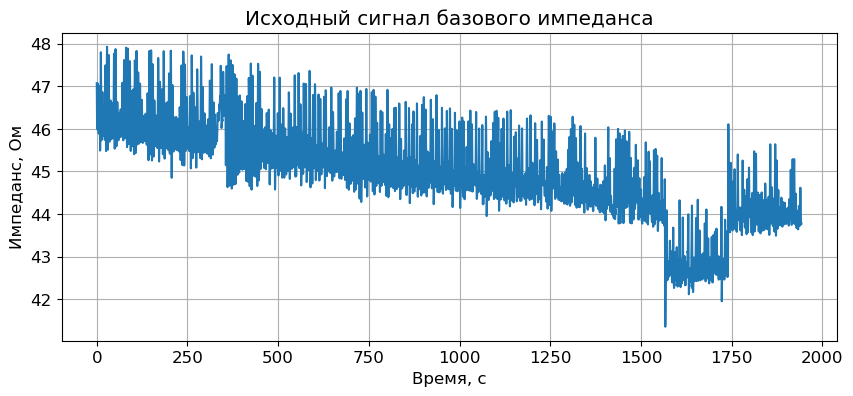

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t, z0)
plt.title('Исходный сигнал базового импеданса')
plt.xlabel('Время, с')
plt.ylabel('Импеданс, Ом')
plt.grid()
plt.show()


In [17]:
#Частота дискретизации
import numpy as np

# Разность соседних временных отсчётов
dt = np.diff(t)

# Средний шаг по времени
dt_mean = np.mean(dt)

# Частота дискретизации
fs = 1 / dt_mean

print(f"Средний шаг по времени dt = {dt_mean:.6f} с")
print(f"Частота дискретизации fs = {fs:.2f} Гц")


Средний шаг по времени dt = 0.005000 с
Частота дискретизации fs = 200.00 Гц


In [21]:
from scipy.signal import detrend

z0_proc = detrend(z0)


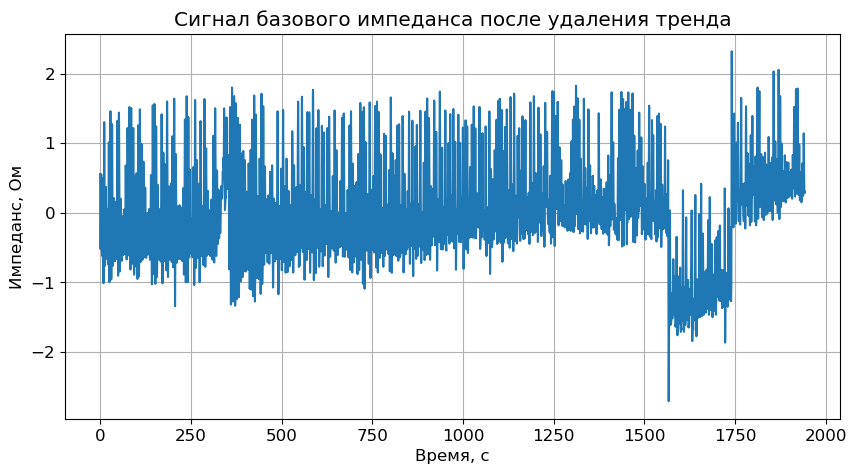

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(t, z0_proc, linewidth=1.5)
plt.xlabel('Время, с')
plt.ylabel('Импеданс, Ом')
plt.title('Сигнал базового импеданса после удаления тренда')
plt.grid()

plt.show()


In [25]:
#проектирование фильтра
from scipy.signal import butter, filtfilt

fc = 0.5  # Гц — выше дыхания
wn = fc / (fs / 2)

b, a = butter(N=4, Wn=wn, btype='low')


In [27]:
#применение фильтра
z0_filt = filtfilt(b, a, z0_proc)


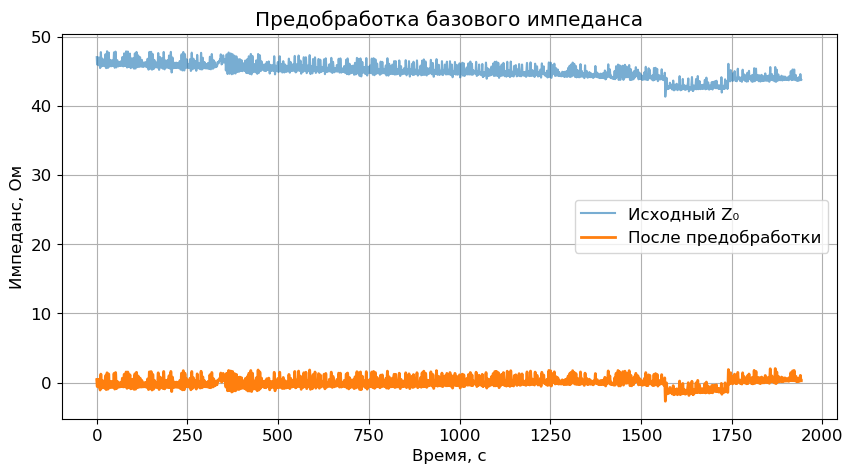

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(t, z0, label='Исходный Z₀', alpha=0.6)
plt.plot(t, z0_filt, label='После предобработки', linewidth=2)
plt.xlabel('Время, с')
plt.ylabel('Импеданс, Ом')
plt.title('Предобработка базового импеданса')
plt.legend()
plt.grid()
plt.show()


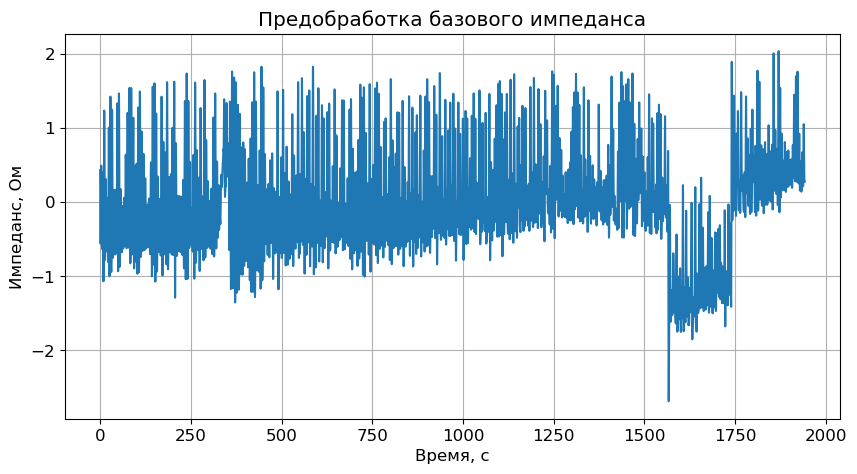

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(t, z0_filt, linewidth=1.5)
plt.xlabel('Время, с')
plt.ylabel('Импеданс, Ом')
plt.title('Предобработка базового импеданса')
plt.grid()
plt.show()




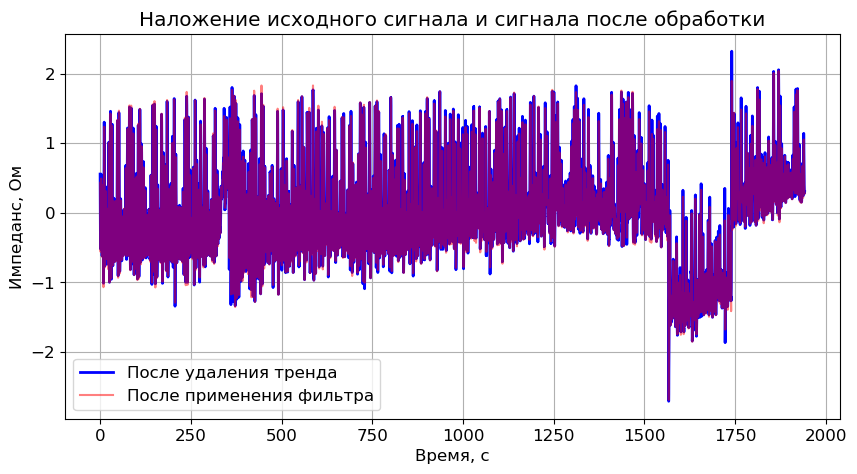

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Сигнал после удаления тренда (без фильтрации)
plt.plot(t, z0_proc, label='После удаления тренда',linewidth=2, color='blue')

# Сигнал после фильтрации
plt.plot(t, z0_filt, label='После применения фильтра', alpha=0.5, color='red')

plt.xlabel('Время, с')
plt.ylabel('Импеданс, Ом')
plt.title('Наложение исходного сигнала и сигнала после обработки')
plt.legend()
plt.grid()
plt.show()



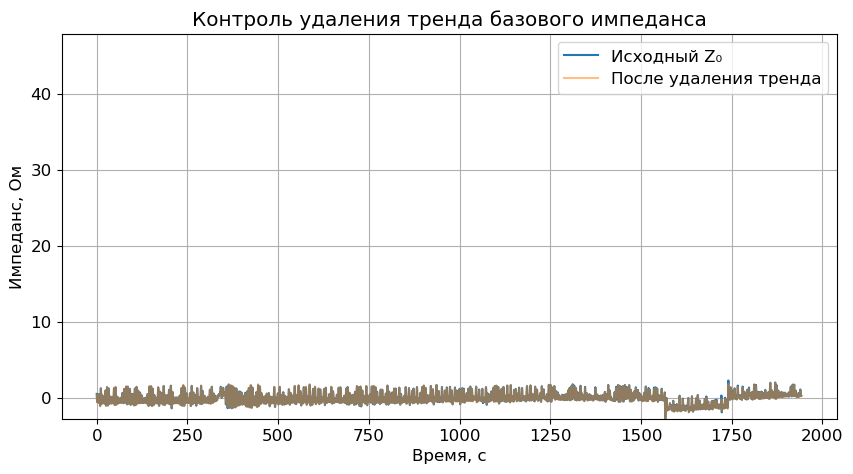

In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

plt.plot(t, z0_proc, label='Исходный Z₀')
plt.plot(t, z0_filt, label='После удаления тренда', alpha=0.5)

plt.xlabel('Время, с')
plt.ylabel('Импеданс, Ом')
plt.title('Контроль удаления тренда базового импеданса')

# Общий масштаб по Y
y_min = min(z0.min(), z0_proc.min())
y_max = max(z0.max(), z0_proc.max())
plt.ylim([y_min, y_max])

plt.legend()
plt.grid()
plt.show()



In [1]:
from PyEMD import EMD, EEMD
from scipy.signal import welch
import matplotlib.pyplot as plt
import numpy as np


In [36]:
eemd = EEMD()
eemd.noise_width = 0.2 * np.std(z0_proc)
eemd.trials = 10   #временно уменьшаем

imfs = eemd(z0_proc)
print("EEMD завершён")
print("IMF shape:", imfs.shape)


EEMD завершён
IMF shape: (20, 388325)


In [38]:
eemd = EEMD()
eemd.noise_width = 0.2 * np.std(z0_proc)  # уровень шума
eemd.trials = 100  # количество ансамблей

imfs = eemd(z0_proc)
print(f"Количество IMF: {imfs.shape[0]}")


Количество IMF: 20
